# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

**Full Name : Mohammad Sadra khamoshi**

**Std Num : 97521261**

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [ ]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 11.03 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_image

costom dataset config:

In [ ]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [ ]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://api.ferrarinetwork.ferrari.com/v2/network-content/medias//resize/5f993356fe3b8d087f91e1c5-ferrari-roma-car-design-award_2020?apikey=9QscUiwr5n0NhOuQb463QEKghPrVlpaF&width=1080
Completed Image ====> 2.5f993356fe3b8d087f91e1c5-ferrari-roma-car-design-award_2020.jpg
Image URL: https://auto1-homepage.prod.mp.auto1.cloud/static/optimized/orange-car-hp-right-mercedez.png
Completed Image ====> 3.orange-car-hp-right-mercedez.png
Image URL: https://1auto.co/storage/ready_for_sales/20210709155718_2022-chevrolet-corvette-z06-16

## 2.2 Splite data To train set && test set

In [ ]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'train imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard train imagess:  47
Leopard test images:  13
bird train imagess:  47
bird test images:  13
car train imagess:  47
car test images:  13
cat train imagess:  47
cat test images:  13
dog train imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [2]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [3]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'train images: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard train images:  47
Leopard test images:  13
bird train images:  47
bird test images:  13
car train images:  47
car test images:  13
cat train images:  47
cat test images:  13
dog train images:  47
dog test images:  13


# 4. Generator

In [4]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(directory='/content/train',target_size=(256, 256),
                                                    color_mode="rgba", class_mode='categorical',
                                                    batch_size=batch_size, shuffle=True, seed=42,
                                                    save_format='jpg' )

validation_generator = test_datagen.flow_from_directory(directory='/content/test', target_size=(256, 256),
                                                        color_mode="rgba", shuffle=False, save_format='jpg', seed=42,
                                                        batch_size=batch_size)


Found 216 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


In [5]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 256, 256, 4)
(16, 5)


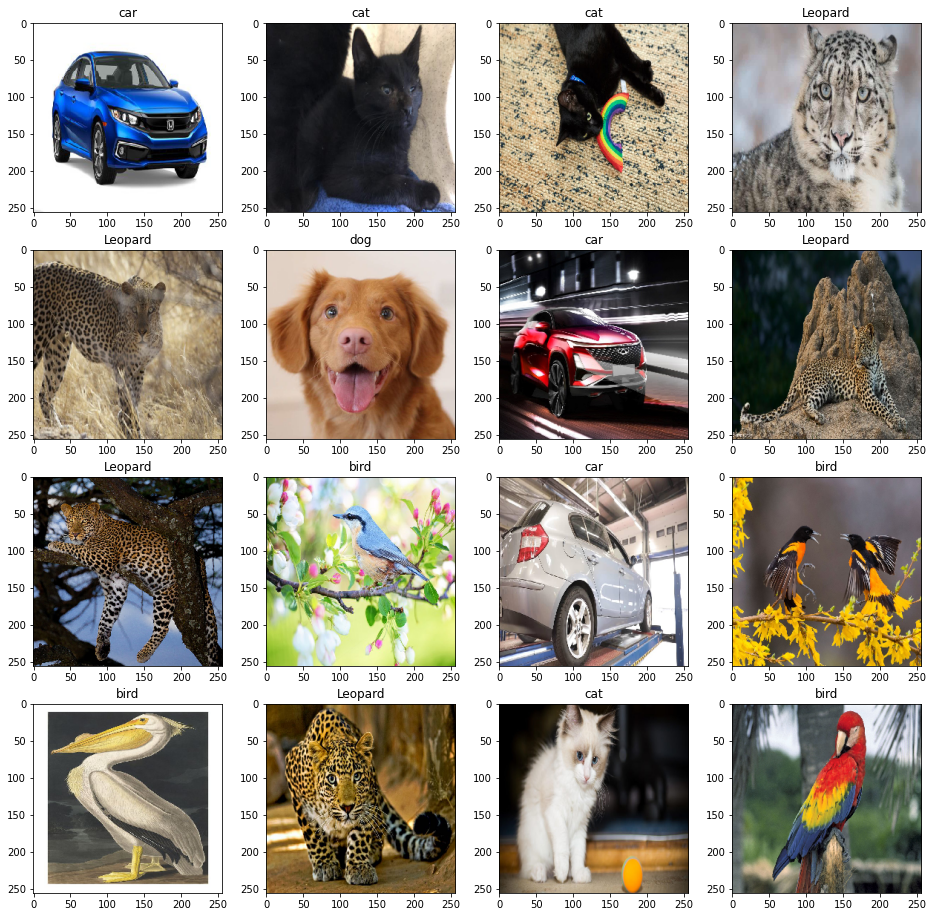

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img / 255)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [68]:
# imports
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, activations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [13]:
x, y = train_generator.__getitem__(1)
EPOCHS = 25
BATCH_SIZE = 16
INPUT_SHAPE = x[0].shape
CLASS_NUM = len(categories)
print('input_shape is : {input_shape}'.format(input_shape= INPUT_SHAPE))
print('class nums  is : {class_num}'.format(class_num= CLASS_NUM))
print('==+'*20)

def build_model():
  model = models.Sequential()
  model.add(keras.layers.Input(shape=INPUT_SHAPE))
  
  # convolutional layers 
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='elu'))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))


  model.add(keras.layers.Flatten())
  # fully connected layers
  model.add(layers.Dense(128, activation='elu' ))
  model.add(layers.Dense(CLASS_NUM, activation='softmax' ))
  print(model.summary())
  return model

input_shape is : (256, 256, 4)
class nums  is : 5
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+


In [15]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
no_drop_no_agu_his = model.fit(train_generator, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      1184      
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 60, 32)       

4/4 [==============================] - 1s 173ms/step - loss: 2.3610 - accuracy: 0.3065
==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+==+


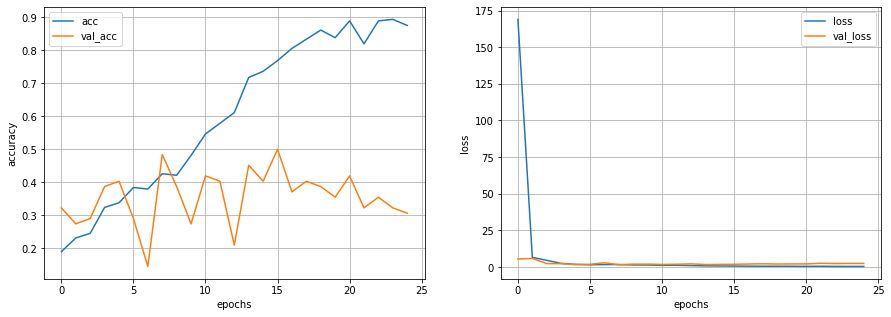

In [16]:
val = model.evaluate(validation_generator, batch_size=BATCH_SIZE)
print('==+'*100)

def plot_history(history):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 2, 1)
  plt.grid(True)
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['acc', 'val_acc'], loc='best')

  plt.subplot(1, 2, 2)
  plt.grid(True)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.legend(['loss', 'val_loss'], loc='best')
  plt.show()

plot_history(no_drop_no_agu_his)

# Part B: train model using data augmentation

### 1. Build ImageDataGenerator for Data Augmentation

In [17]:
train_datagen_augment = ImageDataGenerator(
    rescale=1./255,
    rotation_range=35,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
)

test_datagen_augment = ImageDataGenerator(rescale=1./255)

train_generator_augment = train_datagen_augment.flow_from_directory(directory='/content/train',target_size=(256, 256),
                                                    color_mode="rgba", class_mode='categorical',
                                                    batch_size=batch_size, shuffle=True, seed=42,
                                                    save_format='jpg')

validation_generator_augment = test_datagen_augment.flow_from_directory(directory='/content/test', target_size=(256, 256),
                                                        color_mode="rgba", shuffle=False, save_format='jpg', seed=42,
                                                        batch_size=batch_size)


Found 216 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


### 2. Build and Train Model With Data Augmentation

In [19]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
history_augment = model.fit(train_generator_augment, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_generator_augment)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      1184      
                                                                 
 conv2d_21 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 60, 60, 32)       

4/4 [==============================] - 1s 180ms/step - loss: 1.3735 - accuracy: 0.3710


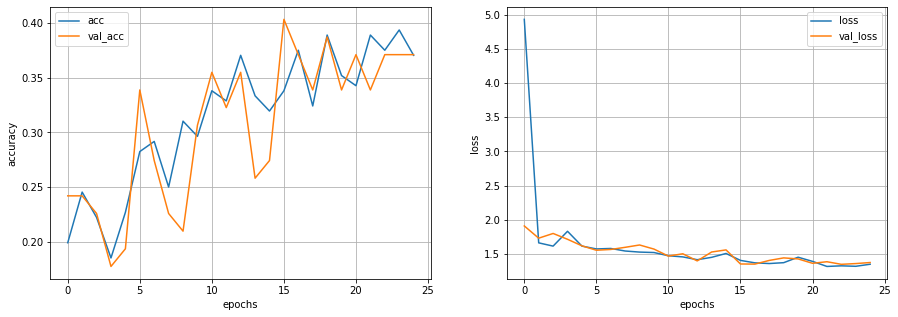

In [20]:
model.evaluate(validation_generator_augment, batch_size=BATCH_SIZE)
plot_history(history=history_augment)

In [26]:
train_datagen_augment = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
)

test_datagen_augment = ImageDataGenerator(rescale=1./255)

train_generator_augment = train_datagen_augment.flow_from_directory(directory='/content/train',target_size=(256, 256),
                                                    color_mode="rgba", class_mode='categorical',
                                                    batch_size=batch_size, shuffle=True, seed=42,
                                                    save_format='jpg')

validation_generator_augment = test_datagen_augment.flow_from_directory(directory='/content/test', target_size=(256, 256),
                                                        color_mode="rgba", shuffle=False, save_format='jpg', seed=42,
                                                        batch_size=batch_size)

Found 216 images belonging to 5 classes.
Found 62 images belonging to 5 classes.


In [35]:
model = build_model()
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
history_augment = model.fit(train_generator_augment, epochs=40, batch_size=BATCH_SIZE, validation_data=validation_generator_augment)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 254, 254, 32)      1184      
                                                                 
 conv2d_69 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 60, 60, 32)      

4/4 [==============================] - 1s 177ms/step - loss: 1.4496 - accuracy: 0.5000


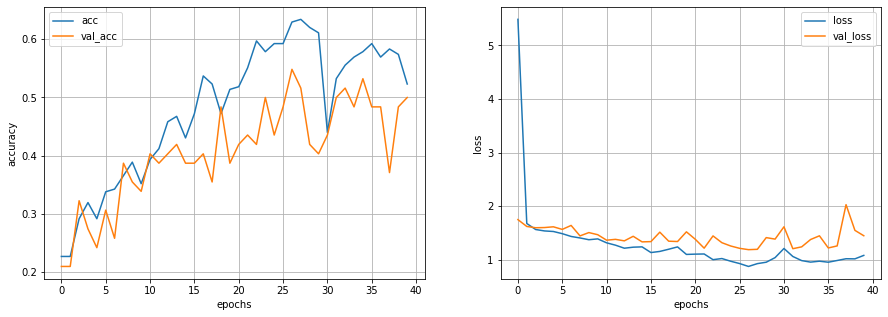

In [36]:
model.evaluate(validation_generator_augment, batch_size=BATCH_SIZE)
plot_history(history=history_augment)

# Part C: build and train model with dropout

In [37]:
def build_model(dropout_rate):
  model = models.Sequential()
  model.add(keras.layers.Input(shape=INPUT_SHAPE))
  
  # convolutional layers 
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='elu'))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),  activation='elu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))


  model.add(keras.layers.Flatten())
  # fully connected layers
  model.add(layers.Dense(128, activation='elu' ))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(CLASS_NUM, activation='softmax' ))
  return model

### 1.dropout rate = 0.3

In [52]:
model = build_model(0.3)
loss = 'categorical_crossentropy'
optimizer = 'adam'
model.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
history_drop_3 = model.fit(train_generator_augment, epochs=25, batch_size=BATCH_SIZE, validation_data=validation_generator_augment)

Epoch 1/25
14/14 [==============================] - 9s 579ms/step - loss: 4.6947 - accuracy: 0.2454 - val_loss: 2.1115 - val_accuracy: 0.2258
Epoch 2/25
14/14 [==============================] - 8s 579ms/step - loss: 2.2926 - accuracy: 0.2500 - val_loss: 2.1386 - val_accuracy: 0.2903
Epoch 3/25
14/14 [==============================] - 8s 556ms/step - loss: 1.8472 - accuracy: 0.2963 - val_loss: 1.4887 - val_accuracy: 0.4516
Epoch 4/25
14/14 [==============================] - 8s 561ms/step - loss: 1.5226 - accuracy: 0.3889 - val_loss: 1.4498 - val_accuracy: 0.4194
Epoch 5/25
14/14 [==============================] - 8s 579ms/step - loss: 1.4835 - accuracy: 0.4028 - val_loss: 1.5482 - val_accuracy: 0.3710
Epoch 6/25
14/14 [==============================] - 8s 559ms/step - loss: 1.4757 - accuracy: 0.4352 - val_loss: 1.4517 - val_accuracy: 0.4677
Epoch 7/25
14/14 [==============================] - 8s 553ms/step - loss: 1.3715 - accuracy: 0.4815 - val_loss: 1.3875 - val_accuracy: 0.4839
Epoch 

4/4 [==============================] - 1s 175ms/step - loss: 1.5353 - accuracy: 0.5323


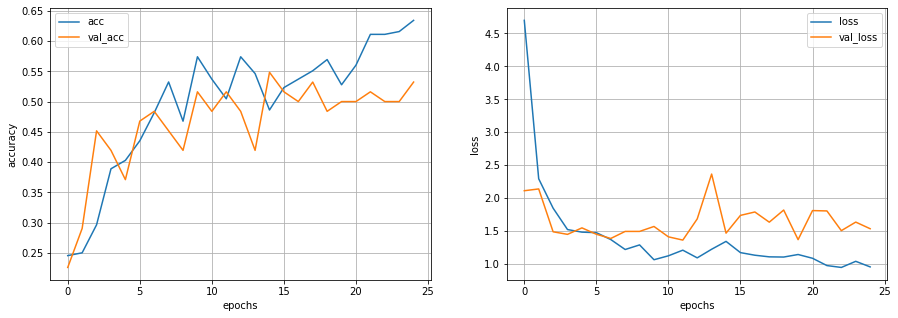

In [53]:
model.evaluate(validation_generator_augment, batch_size=BATCH_SIZE)
plot_history(history_drop_3)

### 3.dropout rate = 0.75

In [61]:
model_75 = build_model(0.75)
loss = 'categorical_crossentropy'
optimizer = 'adam'
model_75.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
history_drop_75 = model_75.fit(train_generator_augment, epochs=40, batch_size=BATCH_SIZE, validation_data=validation_generator_augment)

Epoch 1/40
14/14 [==============================] - 9s 590ms/step - loss: 5.7522 - accuracy: 0.2315 - val_loss: 3.8610 - val_accuracy: 0.1935
Epoch 2/40
14/14 [==============================] - 8s 549ms/step - loss: 4.1888 - accuracy: 0.2870 - val_loss: 1.5956 - val_accuracy: 0.3226
Epoch 3/40
14/14 [==============================] - 8s 546ms/step - loss: 2.9821 - accuracy: 0.2639 - val_loss: 1.6770 - val_accuracy: 0.3065
Epoch 4/40
14/14 [==============================] - 8s 577ms/step - loss: 2.6668 - accuracy: 0.3241 - val_loss: 1.5768 - val_accuracy: 0.3548
Epoch 5/40
14/14 [==============================] - 8s 548ms/step - loss: 2.4312 - accuracy: 0.3148 - val_loss: 2.0815 - val_accuracy: 0.3387
Epoch 6/40
14/14 [==============================] - 8s 547ms/step - loss: 2.6125 - accuracy: 0.3565 - val_loss: 1.7127 - val_accuracy: 0.4194
Epoch 7/40
14/14 [==============================] - 8s 575ms/step - loss: 2.6060 - accuracy: 0.3519 - val_loss: 2.0081 - val_accuracy: 0.3710
Epoch 

4/4 [==============================] - 1s 183ms/step - loss: 1.3054 - accuracy: 0.5645


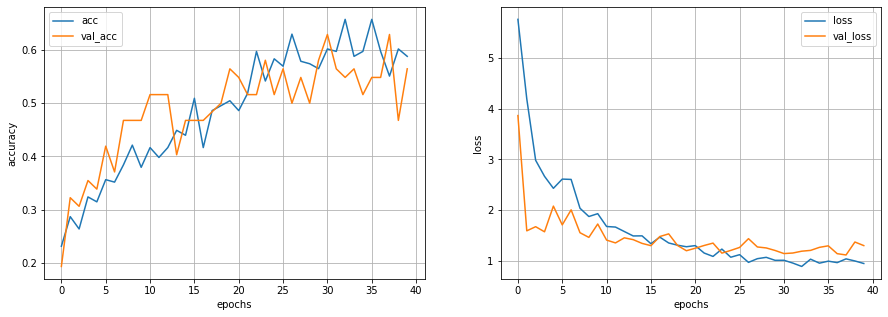

In [63]:
model_75.evaluate(validation_generator_augment, batch_size=BATCH_SIZE)
plot_history(history_drop_75)

### 2.dropout rate = 0.5 

In [62]:
model_50 = build_model(0.5)
loss = 'categorical_crossentropy'
optimizer = 'adam'
model_50.compile(loss= loss, optimizer= optimizer, metrics=['accuracy'])
history_drop_5 = model_50.fit(train_generator_augment, epochs=40, batch_size=BATCH_SIZE, validation_data=validation_generator_augment)

Epoch 1/40
14/14 [==============================] - 9s 591ms/step - loss: 6.1417 - accuracy: 0.1991 - val_loss: 2.1395 - val_accuracy: 0.2097
Epoch 2/40
14/14 [==============================] - 8s 544ms/step - loss: 2.7157 - accuracy: 0.1620 - val_loss: 2.0165 - val_accuracy: 0.3387
Epoch 3/40
14/14 [==============================] - 8s 548ms/step - loss: 2.4023 - accuracy: 0.2407 - val_loss: 1.5918 - val_accuracy: 0.3226
Epoch 4/40
14/14 [==============================] - 8s 546ms/step - loss: 2.2123 - accuracy: 0.2454 - val_loss: 1.6549 - val_accuracy: 0.2419
Epoch 5/40
14/14 [==============================] - 8s 550ms/step - loss: 2.5480 - accuracy: 0.2593 - val_loss: 1.8822 - val_accuracy: 0.3065
Epoch 6/40
14/14 [==============================] - 8s 556ms/step - loss: 2.3664 - accuracy: 0.1806 - val_loss: 1.8552 - val_accuracy: 0.2258
Epoch 7/40
14/14 [==============================] - 8s 548ms/step - loss: 2.3417 - accuracy: 0.2269 - val_loss: 1.5909 - val_accuracy: 0.3226
Epoch 

4/4 [==============================] - 1s 187ms/step - loss: 1.6392 - accuracy: 0.4839


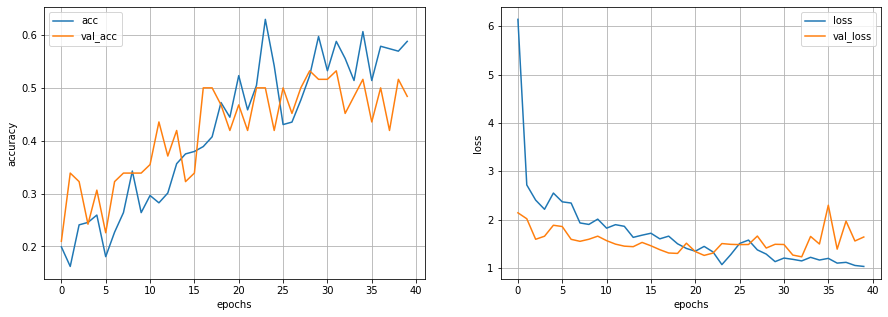

In [64]:
model_50.evaluate(validation_generator_augment, batch_size=BATCH_SIZE)
plot_history(history_drop_5)

# Bonus Part


### F1-Score, Precision, Recall

In [65]:
prediction = model_75.predict(validation_generator)
y_pred = np.argmax(prediction, axis=1)
y_target = validation_generator.classes
print(classification_report(y_target, y_pred, target_names = categories))

              precision    recall  f1-score   support

     Leopard       0.26      0.92      0.40        13
        bird       0.00      0.00      0.00        13
         car       0.47      0.54      0.50        13
         cat       0.00      0.00      0.00        12
         dog       0.00      0.00      0.00        11

    accuracy                           0.31        62
   macro avg       0.14      0.29      0.18        62
weighted avg       0.15      0.31      0.19        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

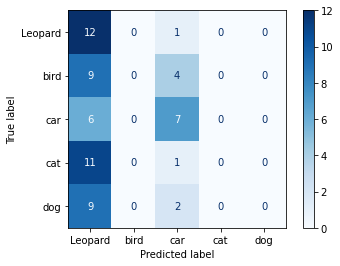

In [69]:
cm = confusion_matrix(y_target, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
matrix.plot(cmap=plt.cm.Blues)
plt.show()